# Import libraries

In [1]:
# !pip install tensorflow==2.8
# !pip install tensorflowjs
# !pip install numpy==1.21
# !pip install protobuf==3.20.*
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn

In [2]:
import pathlib
from pathlib import Path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, recall_score, precision_score, accuracy_score
from tensorflow.keras.utils import set_random_seed
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd

In [3]:
import tensorflowjs as tfjs

# Setting a seed
Setting a seed so we can guarantee the same results no matter how many times we run the script

In [4]:
seed = 1605
np.random.seed(seed)
set_random_seed(seed)

# Setting the image directory

In [5]:
train_path = pathlib.Path("./data_augmented/train")
val_path = pathlib.Path('./data_augmented/val')
test_path = pathlib.Path('./data_augmented/test')

train_data = list(train_path.glob('*/*.jpeg'))

In [6]:
subpath = list(train_path.glob('*'))
species = []
boxplot_data = []

for i in range (0, len(subpath)):
    species.append(subpath[i].name)
    boxplot_data.append([subpath[i].name, len(os.listdir(subpath[i]))])

species.sort()

In [7]:
no_of_files = pd.DataFrame(columns=['Species', 'No of files'], data=boxplot_data)
list_of_species = []

for index, row in no_of_files.iterrows():
    if row['No of files'] >= 1000:
        list_of_species.append(row['Species'])
        
list_of_species   
len(list_of_species)

65

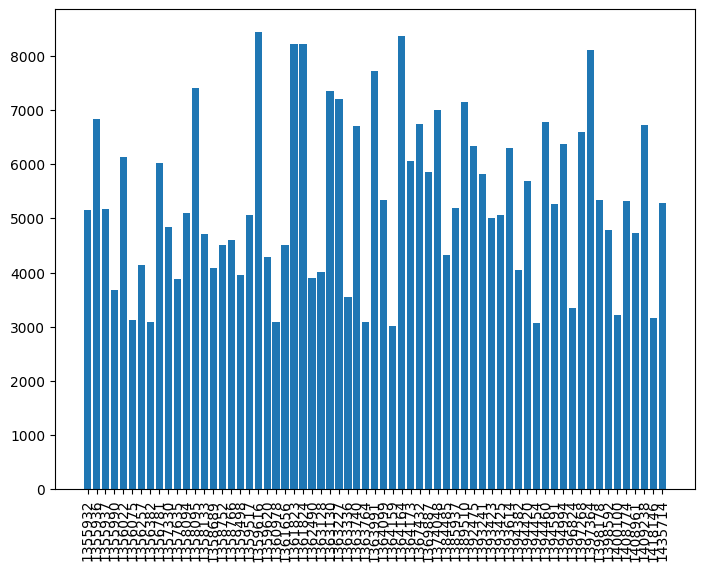

In [8]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plot_species = no_of_files['Species']
plot_numbers = no_of_files['No of files']
ax.bar(plot_species,plot_numbers)
plt.xticks(rotation = 90)
plt.show()

# Setting image height and width

In [9]:
image_size = (150, 150) # (height, width)

In [10]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    seed=1337,
    image_size=image_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    seed=1337,
    image_size=image_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    seed=1337,
    image_size=image_size
)

Found 347152 files belonging to 65 classes.
Found 19759 files belonging to 65 classes.
Found 19753 files belonging to 65 classes.


# Setting the model

In [11]:
model = Sequential()

# adding layers
model.add(Conv2D(96, (3, 3), input_shape=(image_size[0], image_size[1], 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Conv2D(16, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu'))
model.add(Conv2D(64, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='valid'))
model.add(Conv2D(64, (3, 3), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Conv2D(32, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu'))
model.add(Conv2D(128, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='valid'))
model.add(Conv2D(128, (3, 3), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Conv2D(48, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu'))
model.add(Conv2D(192, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='valid'))
model.add(Conv2D(192, (3, 3), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Conv2D(64, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu'))
model.add(Conv2D(256, (1, 1), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='valid'))
model.add(Conv2D(256, (3, 3), input_shape=(image_size[0], image_size[1], 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=None))
model.add(Dropout(0.5))
model.add(Conv2D(32, kernel_size=(1,1), padding='valid', activation='relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(len(species), activation='softmax'))
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 96)      2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1552      
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        1088      
                                                                 
 conv2d_3 (Conv2D)           (None, 74, 74, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

# Setting epochs and fitting the model

In [13]:
epochs=20

In [14]:
result = model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=300) #batch_size=1

Epoch 1/20
10849/10849 [==============================] - 824s 75ms/step - loss: 3.2872 - accuracy: 0.1606 - val_loss: 2.5865 - val_accuracy: 0.3124
Epoch 2/20
10849/10849 [==============================] - 814s 75ms/step - loss: 2.4303 - accuracy: 0.3487 - val_loss: 2.1654 - val_accuracy: 0.4188
Epoch 3/20
10849/10849 [==============================] - 814s 75ms/step - loss: 2.1774 - accuracy: 0.4104 - val_loss: 2.0113 - val_accuracy: 0.4510
Epoch 4/20
10849/10849 [==============================] - 815s 75ms/step - loss: 2.0227 - accuracy: 0.4477 - val_loss: 1.8317 - val_accuracy: 0.4956
Epoch 5/20
10849/10849 [==============================] - 815s 75ms/step - loss: 1.9167 - accuracy: 0.4734 - val_loss: 1.7930 - val_accuracy: 0.5070
Epoch 6/20
10849/10849 [==============================] - 815s 75ms/step - loss: 1.8407 - accuracy: 0.4912 - val_loss: 1.7932 - val_accuracy: 0.5056
Epoch 7/20
10849/10849 [==============================] - 814s 75ms/step - loss: 1.7897 - accuracy: 0.5038

# Graph of loss change and accuracy change on train and val datasets

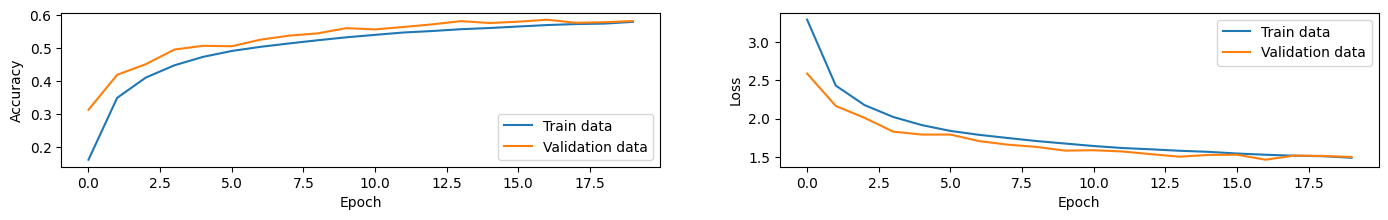

In [15]:
history = result

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']

plt.figure(figsize=(17, 2))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc_train, label='Train data')
plt.plot(range(epochs), acc_val, label='Validation data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss_train, label='Train data')
plt.plot(range(epochs), loss_val, label='Validation data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

In [16]:
scores = model.evaluate(val_ds, verbose=0)
print('Val loss:', scores[0])
print('Val accuracy:', scores[1])

Val loss: 1.5015453100204468
Val accuracy: 0.5823169350624084


In [17]:
predictions = model.predict(test_ds)
#print('Predictions:\n', predictions.numpy())

In [18]:
print('Predictions:\n', predictions[np.argmax(tf.nn.softmax(predictions[0]))])
test_scores = model.evaluate(test_ds, verbose=0)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Predictions:
 [2.5133662e-05 2.4126544e-05 1.1169515e-07 2.4776449e-05 3.8778086e-05
 1.3526153e-03 1.1138943e-05 1.1655985e-06 3.5308153e-04 2.2508850e-04
 1.8414541e-05 3.5614803e-06 4.1957672e-05 4.4949552e-06 1.9228645e-02
 4.7889453e-06 7.6298228e-08 5.4090629e-05 1.0146627e-04 1.8339661e-04
 4.0369927e-05 6.4474884e-06 9.2188903e-04 1.7012371e-05 6.3331991e-06
 2.7192118e-07 4.7880771e-06 4.8444512e-05 7.4206417e-07 2.4091523e-02
 1.5369485e-03 2.9674004e-07 2.1192784e-05 4.6539961e-05 1.5921142e-07
 5.7519844e-04 1.7722040e-04 1.8235228e-06 2.8612318e-03 1.7639290e-07
 4.5872470e-03 2.7924539e-03 1.8347832e-04 3.4074408e-05 1.3408695e-03
 1.3541963e-05 2.6966275e-06 8.9450049e-01 4.6863775e-06 3.4847064e-04
 2.4744228e-04 5.4692928e-06 6.0537164e-05 5.8947917e-04 2.5604561e-05
 4.0628391e-05 9.5598714e-04 7.5931050e-05 2.9638609e-06 8.8559173e-06
 3.2828472e-04 1.5821270e-04 4.1420829e-02 5.1627273e-07 2.1579028e-04]
Test loss: 1.4994771480560303
Test accuracy: 0.579810678958892

# Saving the model
Firstly we save it in the default format and then the HDF5 format.

In [19]:
model_version = 'squeezenet_0.1.2'

In [20]:
model.save('./exported_models/v'+model_version+'/botaniai_model_'+model_version+'.keras')

In [21]:
model.save('./exported_models/v'+model_version+'/botaniai_model_'+model_version+'.h5', save_format='h5')

In [22]:
model_json = model.to_json()
with open('./exported_models/v'+model_version+'/botaniai_model_'+model_version+'.json', "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('./exported_models/v'+model_version+'/botaniai_model_weights_'+model_version+'.h5')
print("Saved model to disk")

Saved model to disk


# Convert model to tensorflow.js format

In [23]:
tfjs.converters.save_keras_model(model, './tensorflowjs/v'+model_version+'/')